<h1>
      <h4>
          <p style="font-size:26pt"> MSIN0097 Predictive: Individual Assignment </p>
      </h4>
</div>
<h4>
          <p style="font-size:23pt"> Predicting Travel Insurance Claim Status </p>
      </h4>

</h1>


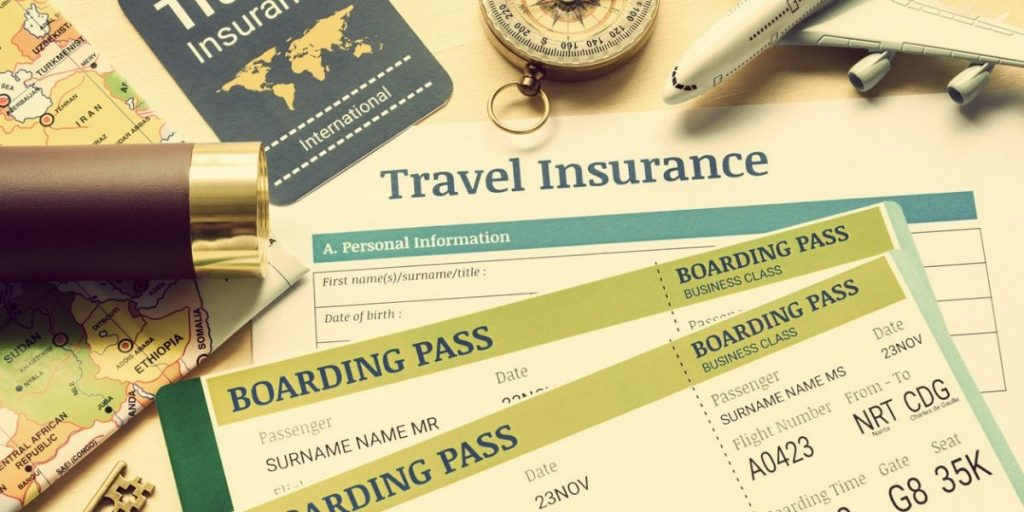

In [366]:
# displaying the word count

import io
from nbformat import current
def nb_word_count(nb_path):
    with io.open(nb_path, 'r', encoding='utf-8') as f:
        nb = current.read(f, 'json')
        word_count = 0
        for cell in nb.worksheets[0].cells:
            if cell.cell_type == "markdown":
                word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
    return word_count
nb_word_count('./Assignment-v2.ipynb') #with the Appendix and References

/Users/sharmishanmugalingam/opt/anaconda3/lib/python3.8/site-packages/nbformat/current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.


FileNotFoundError: [Errno 2] No such file or directory: './Assignment-v2.ipynb'

## Table of Contents
* [1. Introduction](#1.Introduction)
    * [1.1 Business Problem](#1.1-Business-Problem)
    * [1.2 Objectives](#1.2-Objectives)
* [2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    * [2.1 Explore the Data](#2.1-Explore-the-Data)
    * [2.2 Visualise the Data](#2.2-Visualise-the-Data)
* [3. Prepare the Data](#3.-Prepare-the-Data)
    * [3.1 Data Cleaning](#3.1-Data-Cleaning)
    * [3.2 Feature Encoding](#3.2-Feature-Encoding)
    * [3.3 Train-Test Data](#3.3-Train-Test-Data)
    * [3.4 Feature Scaling](#3.4-Feature-Scaling)
    * [3.5 Imbalance Issue](#3.5-Imbalance-Issue)
        * [3.5.1 Under Sampling](#3.5.1-Under-Sampling)
        * [3.5.2 Over Sampling](#3.5.2-Over-Sampling)
        * [3.5.3 SMOTE](#3.5.3-SMOTE)
* [4. Model Building](#4.-Model-Building)
    * [4.1 Training Data with Under Sampling](#4.1-Training-Data-with-Under-Sampling)
        * [4.1.1 Logistic Regression](#4.1.1-Logistic-Regression)
        * [4.1.2 Random Forest](#4.1.2-Random-Forest)
        * [4.1.3 Decision Tree](#4.1.3-Decision-Tree)
        * [4.1.4 SGD](#4.1.4-SGD)
        * [4.1.5 KNN](#4.1.5-KNN)
        * [4.1.6 XGBoost](#4.1.6-XGBoost)
    * [4.2 Training Data with Over Sampling](#4.2-Training-Data-with-Over-Sampling)
        * [4.2.1 Logistic Regression](#4.2.1-Logistic-Regression)
        * [4.2.2 Random Forest](#4.2.2-Random-Forest)
        * [4.2.3 Decision Tree](#4.2.3-Decision-Tree)
        * [4.2.4 SGD](#4.2.4-SGD)
        * [4.2.5 KNN](#4.2.5-KNN)
        * [4.2.6 XGBoost](#4.2.6-XGBoost)
    * [4.3 Training Data with SMOTE](#4.3-Training-Data-with-SMOTE)
        * [4.3.1 Logistic Regression](#4.3.1-Logistic-Regression)
        * [4.3.2 Random Forest](#4.3.2-Random-Forest)
        * [4.3.3 Decision Tree](#4.3.3-Decision-Tree)
        * [4.3.4 SGD](#4.3.4-SGD)
        * [4.3.5 KNN](#4.3.5-KNN)
        * [4.3.6 XGBoost](#4.3.6-XGBoost)
    * [4.4 Model Comparison (Train Test](#4.4-Model-Comparison-(Train-Test)
* [5. Fine Tuning using GridSearchCV](#5.-Fine-Tuning-using-GridSearchCV)
    * [5.1 Random Forest (SMOTE)](#5.1-Random-Forest-(SMOTE))
    * [5.2 Decision Tree (Over Sampling)](#5.2-Decision-Tree-(Over-Sampling))
    * [5.3 KNN (Over Sampling](#5.3-KNN-(Over-Sampling))
    * [5.4 XGBoost (SMOTE)](#5.4-XGBoost-(SMOTE))
* [6. Conclusion](#6.-Conclusion)    



## 1. Introduction

### 1.1 Business Problem

Many travel agencies selling travel packages give their buyers the option to buy travel insurance. Travel insurance is used by many travellers to make sure that they are being protected when travelling domestically or abroad, also covering the costs associated with their travelling. Travel insurance is usually sold by a lot of companies selling tickets or travel packages and gives the consumers the option to purchase travel insurance. 

For any insurance policy, we would like to know whether some features lead to the policy claimed. Some features like age, gender or commision value could have influence on that. Therefore, the goal of this project is to build a ML model for an insurance company that can predict if the insurance buyer will claim their travel insurance or not, from the various travel insurance-related attributes in this dataset. This is a classification problem, as we will have to predict the 'yes' or 'no' claims regarding travel insurance. Using this model, this will help insurance companies accelerate the payment process which will in turn provide better service to insurance buyers.

Usually, travel insurance will have coverage for travelers concerns, including flight delays, trip cancellation, or loggage loss. And, some of policies include medical emergency. It means that the insured's age might have an influence on whether the policy is claimed.

### 1.2 Objectives

The goals of this research are to:
(1) Explore variations in travel insurance claims
(2) Analyse factors that affect travel insurance
(3) Predict the travel insurance claims using ML models.

## 2. Exploratory Data Analysis 

In [2]:
# install packages

!conda install -c conda-forge imbalanced-learn
!conda install -c conda-forge xgboost

SyntaxError: invalid syntax (<ipython-input-2-f05ac09360d3>, line 3)

In [140]:
# to support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# common imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

###### Link to Dataset:

https://www.kaggle.com/mhdzahier/travel-insurance

In [141]:
# import data
insurance = pd.read_csv("/Users/sharmishanmugalingam/Desktop/MSIN0097 Predictive/Individual Coursework/travelinsurance.csv")

# first glance at dataset
insurance.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


### 2.1 Explore the Data

In [142]:
# show list of variables, number of observations per variable and datatypes of each variable 

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


From the above list, we can see that there are 11 variables, which include 4 numerical columns and 7 categorical columns. All variables have 63,326 samples apart from Gender, which only has 18,219 samples, meaning that there is a large amount of missing values.

In [143]:
## variable descriptions:

# Agency: name of agency 
# Agency Type: type of travel insurance
# Distribution Channel: distribution channel of travel insurance agencies 
# Product Name: name of the insurance plan
# Claim: if the insurance is claimed or not
# Duration: duration of the travel (days)
# Destination: destination of travel
# Net Sales: amount of sales of travel insurance policies
# Commision (in value): commission received for travel insurance agency
# Gender: gender of insurance buyer
# Age: age of the insurance buyer

In [144]:
# summary statistics for the numerical attributes in the dataset

insurance.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Taking an initial glance at the dataset, there seems to be some observations:
- Age: the maximum value is 118, which is highly unlikely to be true as the oldest living person is 108 years old.
- Duration: trips cannot be lower than 0 as time cannot be negative.
- Net Sales: insurance price values can't be negative.
- Commission: commission values cannot be higher than insurance prices as commission must be worth less than the insurance price.


In [145]:
# to look at the different types of agencies

insurance["Agency"].value_counts(dropna = False)

EPX    35119
CWT     8580
C2B     8267
JZI     6329
SSI     1056
JWT      749
RAB      725
LWC      689
TST      528
KML      392
ART      331
CCR      194
CBH      101
TTW       98
CSR       86
ADM       82
Name: Agency, dtype: int64

In [146]:
# to look at the different products that the travel insurance company offers 

insurance["Product Name"].value_counts(dropna = False)

Cancellation Plan                       18630
2 way Comprehensive Plan                13158
Rental Vehicle Excess Insurance          8580
Basic Plan                               5469
Bronze Plan                              4049
1 way Comprehensive Plan                 3331
Value Plan                               2715
Silver Plan                              2249
Annual Silver Plan                       1423
Ticket Protector                         1056
Travel Cruise Protect                     527
Comprehensive Plan                        364
Gold Plan                                 352
24 Protect                                247
Single Trip Travel Protect Gold           204
Premier Plan                              194
Annual Gold Plan                          194
Single Trip Travel Protect Silver         173
Annual Travel Protect Gold                100
Annual Travel Protect Silver               86
Individual Comprehensive Plan              74
Single Trip Travel Protect Platinu

In [147]:
# to look at the destinations

insurance["Destination"].value_counts(dropna = False) 

SINGAPORE          13255
MALAYSIA            5930
THAILAND            5894
CHINA               4796
AUSTRALIA           3694
                   ...  
SOLOMON ISLANDS        1
RWANDA                 1
CAMEROON               1
SEYCHELLES             1
SENEGAL                1
Name: Destination, Length: 149, dtype: int64

In [148]:
# to see how balanced our target variable is

insurance["Claim"].value_counts(dropna = False)

No     62399
Yes      927
Name: Claim, dtype: int64

### 2.2 Visualise the Data

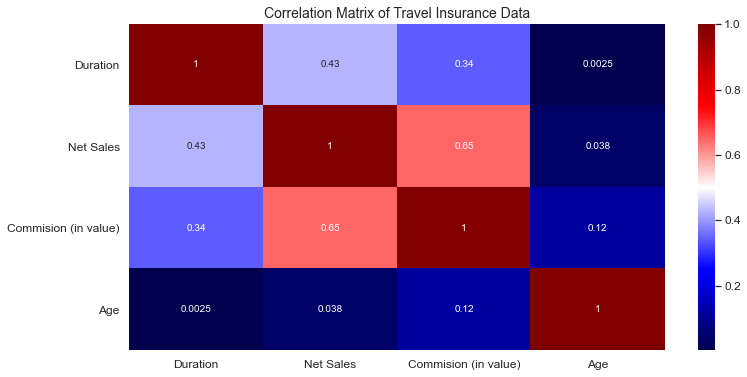

In [149]:
# plot a heatmap to detect for multicollinearity

# plotting a heatmap 
sns.heatmap(insurance.corr(),annot=True,cmap='seismic');

# formatting axis labels
plt.figure(figsize=(12,6))
plt.title("Correlation Matrix of Travel Insurance Data", fontsize=14);

From the above, we can see that there is no high correlation between any of the features therefore we will use all the features to train our model.

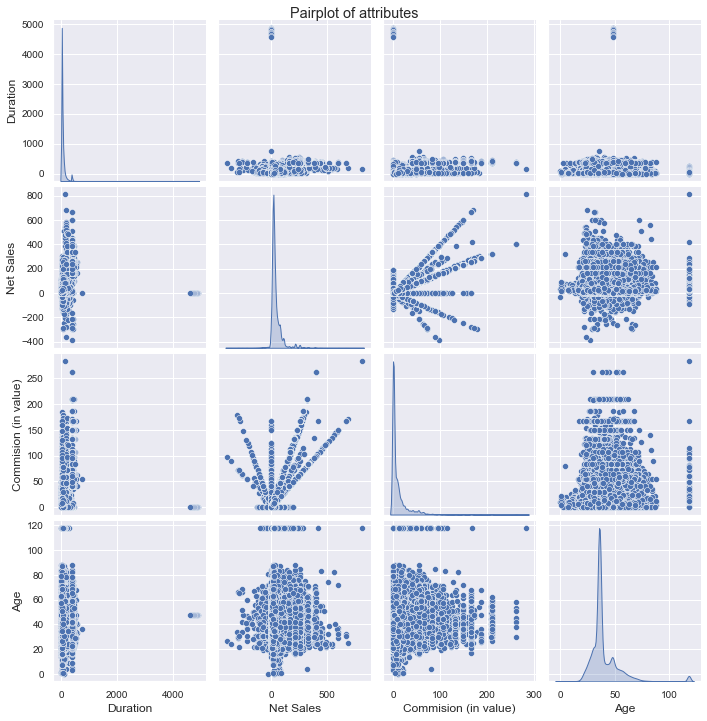

<Figure size 1800x576 with 0 Axes>

In [370]:
# visualise a pairplot to see correlation between features

# plot a pairplot 
f = sns.pairplot(data=insurance, diag_kind = 'kde');

# formatting the figure size
f.fig.suptitle("Pairplot of attributes",  y=1) ;
plt.figure(figsize = (25, 8));

From the above, we can see that there is a clear relationship between commission and net sales, which we would intuitively expect as commission is a function of net sales.

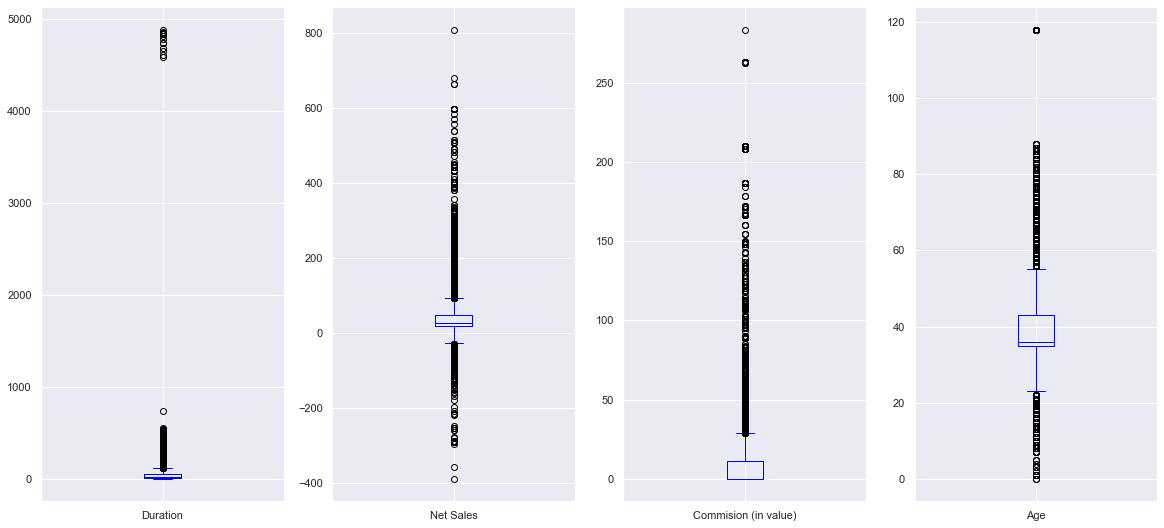

In [155]:
# box and whisker plots to see the distribution and any outliers

insurance.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,20),color='blue')
plt.show()

# we can see that all 4 attributes have outliers at each end of the boxplot, which we will clean in the next section

###### Claim - Target Variable

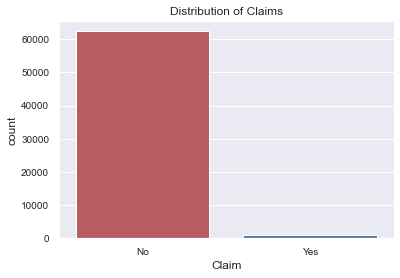

In [373]:
# distribution of target variable, 'Claim'

# plot countplot using seaborn
sns.countplot(x ="Claim", data=insurance, palette=['r','b']).set_title('Distribution of Claims');

The below shows that we have 98.54% 'No' claims, which is very high, compared to 1.46% 'No' claims. 

In [152]:
# percentage of unique values of target variable 

insurance['Claim'].value_counts() / len(insurance) * 100

No     98.536146
Yes     1.463854
Name: Claim, dtype: float64

<div class="alert alert-block alert-success"> <b>Alert:</b> This indicates we have a minority class binary classification problem. </div>

###### Destination

Here, we want to see if destination stands out as having more claims in one country compared to other countries.

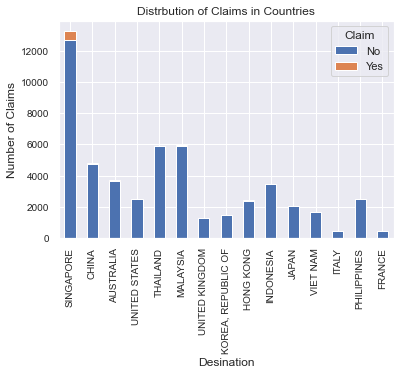

In [374]:
# looking at the top destinations that have the most claims

destinations=pd.crosstab(insurance["Destination"],insurance["Claim"])

# let's look at the top 15 destinations with the most claims
top_destinations=(destinations.sort_values(by=["Yes"],ascending=False)).head(15)

# formatting the axes and labels
top_destinations.plot.bar(stacked=True)
plt.legend(title='Claim')
plt.xlabel("Desination"); plt.ylabel("Number of Claims")
plt.title("Distrbution of Claims in Countries")

# show the graph
plt.show()

###### Agencies

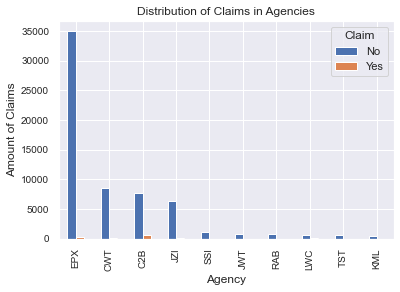

In [376]:
# finding the agencies with the maximum  amount of claims

agencies=pd.crosstab(insurance["Agency"],insurance["Claim"])

# look at the top 10 agencies with the most claims
top_agencies=(agencies.sort_values(by=["No"],ascending=False)).head(10);

# formatting the axes and labels
top_agencies.plot(kind="bar");
plt.xlabel("Agency"); plt.ylabel("Amount of Claims");
plt.title("Distribution of Claims in Agencies");

# we can clearly see that there are more claims made for the agency EPX.

###### Agency Types

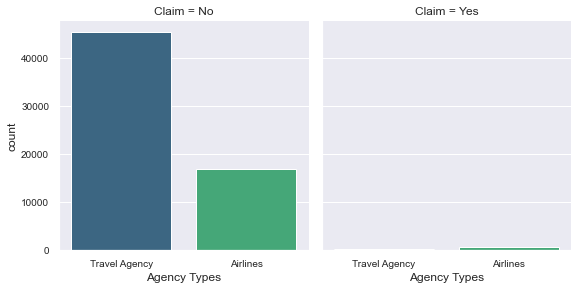

In [383]:
# looking at the amount of claims per agency type

agency_type_plot= sns.catplot(x="Agency Type", col="Claim",data=insurance, kind="count",height=4, palette=("viridis"));

# formatting the axes and labels
agency_type_plot.set(xlabel='Agency Types');


###### Age

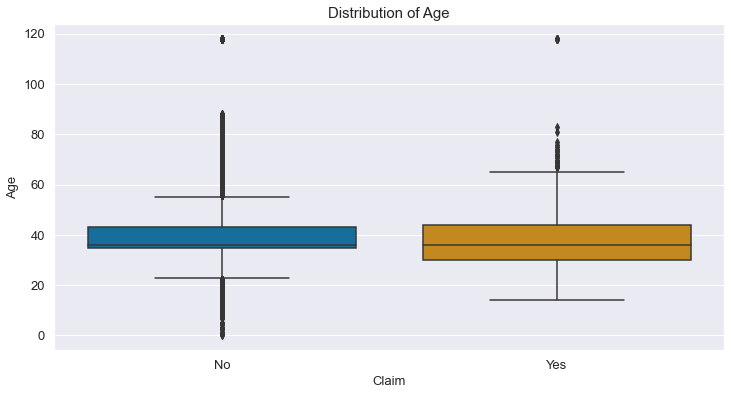

In [318]:
# boxplot to see the distribution of age on claims

# enlarging the graph
plt.figure(figsize = (12, 6));


a = sns.boxplot(y='Age', x='Claim',
                 data=insurance,
                 palette="colorblind");

# The box plot represents the distribution of ages for each "Yes" or "No" claim

# changing graph title
a.axes.set_title("Distribution of Age",fontsize=15);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

# adding axes labels
a.set_ylabel("Age",fontsize=13);
a.set_xlabel("Claim",fontsize=13);

# we can clearly see that there is an outlier here of age 118.

## 3. Prepare the Data

### 3.1 Data Cleaning

###### Gender

In [73]:
# Checking the weightage of null values.

(insurance['Gender'].isnull().sum()/insurance.shape[0]*100).round(2)

71.23

From the above, it's clear that more then 70% of the data have missing values in the Gender column and there are no other features that will help us find out whether the individual is male or female. Therefore, it is decided to drop this feature.

In [74]:
# drop the 'Gender' column since there are too many missing values 

insurance.drop(['Gender'], axis=1, inplace=True)

In [75]:
# renaming the columns (removing the column space)

insurance.rename(columns={'Agency Type':'Agency_Type','Distribution Channel':'Distribution_Channel',
                         'Product Name':'Product_Name','Net Sales':'Net_Sales',
                         'Commision (in value)':'Commision'},inplace=True)

insurance.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


###### Net Sales & Commision

Intuitavely, it doesn't make sense to have Net Sales values that are below 0.

In [76]:
# check if there are any net sales values that are below 0
insurance[insurance['Net_Sales']<0].count()

Agency                  678
Agency_Type             678
Distribution_Channel    678
Product_Name            678
Claim                   678
Duration                678
Destination             678
Net_Sales               678
Commision               678
Age                     678
dtype: int64

In [77]:
# net sales values below 0 could be miscoded
# changing negative net sales values to positive values 

insurance['Net_Sales'] = insurance['Net_Sales'].abs()

In [78]:
# it doesn't make sense for Net Sales to be smaller than Commission as commission is usually represented by a function of net sales.
# check how many net sales values are smaller than commission

insurance[insurance['Net_Sales']<insurance['Commision']]

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision,Age
31,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,54,AUSTRALIA,0.0,41.58,31
129,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,5,MALAYSIA,0.0,29.70,53
144,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,201,AUSTRALIA,0.0,77.22,23
241,C2B,Airlines,Online,Bronze Plan,No,18,SINGAPORE,0.0,7.47,45
260,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,5,MALAYSIA,0.0,29.70,54
...,...,...,...,...,...,...,...,...,...,...
62806,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,0.0,6.63,24
62833,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,165,AUSTRALIA,0.0,29.70,26
62993,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,5,MALAYSIA,0.0,17.82,53
62996,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,3,MALAYSIA,0.0,17.82,49


In [79]:
# to fix this, we will fill Net Sales with 0 value with 0 commision

insurance.loc[insurance['Net_Sales']<=0]=insurance['Commision'].min()

In [80]:
# to check there are no values of commission that are above net sales

len(insurance[insurance['Net_Sales']<insurance['Commision']])

0

###### Duration

In [81]:
# the skewness of the duration values is important as time can't be negative.
# checking the amount of duration values which are negative

insurance[(insurance['Duration'] <= 0)].count()

Agency                  1949
Agency_Type             1949
Distribution_Channel    1949
Product_Name            1949
Claim                   1949
Duration                1949
Destination             1949
Net_Sales               1949
Commision               1949
Age                     1949
dtype: int64

In [82]:
# checking the amount of duration values below 0 is coming from majority class 'No'

insurance[(insurance['Duration'] <= 0) & (insurance['Claim'] == "No")].count()

Agency                  65
Agency_Type             65
Distribution_Channel    65
Product_Name            65
Claim                   65
Duration                65
Destination             65
Net_Sales               65
Commision               65
Age                     65
dtype: int64

In [83]:
# as the majority of the Duration <0 is in the majority claim, we can drop these samples
# removing all values where Duration is below 0

# get names of indexes for rows where Duration has value <= 0
index_names = insurance[(insurance['Duration'] <= 0)].index 
  
# drop these given rows 
insurance.drop(index_names, inplace = True) 

In [84]:
# check if all the values containing duration <0 have been removed

insurance[insurance['Duration']<=0].count()

Agency                  0
Agency_Type             0
Distribution_Channel    0
Product_Name            0
Claim                   0
Duration                0
Destination             0
Net_Sales               0
Commision               0
Age                     0
dtype: int64

###### Age

In [85]:
# impossible to give insurance to a person over age of 100.
# checking the amount of age values above 100 

insurance[insurance['Age'] >= 100].count()

Agency                  937
Agency_Type             937
Distribution_Channel    937
Product_Name            937
Claim                   937
Duration                937
Destination             937
Net_Sales               937
Commision               937
Age                     937
dtype: int64

In [86]:
# get names of indexes for rows where Age >=100
index_names = insurance[(insurance['Age'] >= 100)].index 
  
# drop these given rows 
insurance.drop(index_names, inplace = True) 

###### Claim

In [87]:
# change claim (target variable) into binary variables 0,1 

insurance['Claim'] = insurance['Claim'].map({'Yes':1,'No':0})
insurance['Claim']

0        0
1        0
2        0
3        0
4        0
        ..
63321    0
63322    0
63323    0
63324    0
63325    0
Name: Claim, Length: 60440, dtype: int64

In [88]:
# check the amount of variables we have after cleaning the data

insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60440 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                60440 non-null  object 
 1   Agency_Type           60440 non-null  object 
 2   Distribution_Channel  60440 non-null  object 
 3   Product_Name          60440 non-null  object 
 4   Claim                 60440 non-null  int64  
 5   Duration              60440 non-null  int64  
 6   Destination           60440 non-null  object 
 7   Net_Sales             60440 non-null  float64
 8   Commision             60440 non-null  float64
 9   Age                   60440 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 5.1+ MB


### 3.2 Feature Encoding 

It is important for all the values in the dataset to be numerical so that the machine learning models can run. To encode the categoorical features, we use the pandas get_dummies method to transform the categorical features into dummy variables.

In [89]:
# impute one hot encoding for the columns: "Agency", "Agency_Type", "Distribution_Channel", "Product name" and "Destination"

# creating dummies for categorical columns
insurance_new = pd.get_dummies(insurance,columns=['Agency', 'Agency_Type', 'Distribution_Channel', "Product_Name", "Destination"])
insurance_new.head()

,Claim,Duration,Net_Sales,Commision,Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,0,186,29.0,9.57,81,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,186,29.0,9.57,71,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,65,49.5,29.70,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,60,39.6,23.76,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,79,19.8,11.88,41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# to check that there is now no categorical data

insurance_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60440 entries, 0 to 63325
Columns: 195 entries, Claim to Destination_ZIMBABWE
dtypes: float64(2), int64(3), uint8(190)
memory usage: 13.7 MB


### 3.3 Train-Test Data

As we are dealing with an imbalanced dataset, we use stratified sampling to split the classes proportionally between the training and test set. 

In [251]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split dataset between features and target
Y = insurance_new['Claim']
X = insurance_new.drop(['Claim'], axis=1)

# split the data into 80% training data and 20% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y)

In [92]:
# to see what the training set looks like

X_train.head()

,Duration,Net_Sales,Commision,Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
14199,114,23.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7305,5,24.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45869,33,69.3,41.58,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11707,94,74.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32795,5,80.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# to see what the testing set looks like

X_test.head()

,Duration,Net_Sales,Commision,Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
123,23,30.55,7.64,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63120,4,37.00,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26196,24,30.00,10.50,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7468,60,44.00,15.40,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37572,40,56.00,19.60,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# to see the split and size of samples in both training and testing sets

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(42308, 194) (18132, 194) (42308,) (18132,)


### 3.4 Feature Scaling

In [253]:
# import standard standardisation to scale the data
from sklearn.preprocessing import StandardScaler

# using the standard scaler
scale = StandardScaler()

# fit on train data
X_train = scale.fit_transform(X_train)

# transform on test data
X_test=scale.transform(X_test)

### 3.5 Imbalance Issue

There are 3 methods which can be used to deal with the problem of imbalanced classification and improve the class distribution:
- Under Sampling
- Over Sampling
- SMOTE

We only use these methods on the training data to ensure our model generalises well to unseen data (test data).


### 3.5.1 Under Sampling

We use Random Under Sampling module from Scitkit_Learn to randomly remove samples from the majority class.

In [96]:
# Under sampling is removing some observations of the majority class. 
# The disadvantage fo this is removing information that may be valuable. 
# This could lead to underfitting and poor generalization to the test set.

In [97]:
# import resample - Under sample
from imblearn.under_sampling import RandomUnderSampler

# use Random Under sampling
US = RandomUnderSampler(random_state = 42, sampling_strategy = 1.0) 

# fit the under sampling to training data
X_train_US, Y_train_US = US.fit_resample(X_train, Y_train)

# check the size of training samples
print(X_train_US.shape, Y_train_US.shape)

(1284, 194) (1284,)


In [98]:
# check the amount of under sampling data in each class
Y_train_US.value_counts()

1    642
0    642
Name: Claim, dtype: int64

### 3.5.2 Over Sampling

In [99]:
# import resample - Over sample
from imblearn.over_sampling import RandomOverSampler

# use Random Over sampling
OS = RandomOverSampler() 

# fit the over sampling to the training data
X_train_OS, Y_train_OS = OS.fit_resample(X_train, Y_train)

# check the size of training samples
print(X_train_OS.shape, Y_train_OS.shape)

(83332, 194) (83332,)


In [100]:
# check the amount of over sampling data in each class
Y_train_OS.value_counts()

1    41666
0    41666
Name: Claim, dtype: int64

### 3.5.3 SMOTE

Before we use SMOTE, we reduce the dimensionality of the data using PCA and then create new synthetic points from the minority class using SMOTE. 

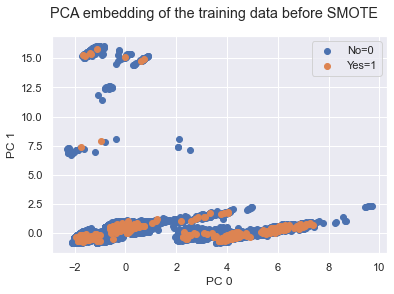

In [101]:
# import PCA
from sklearn.decomposition import PCA

# reducing the feature to 2 dimensions using PCA
pca_before = PCA(n_components=2) 

# use PCA to fit the training set
pca_before.fit(X_train)

# use PCA to transform the training set
Z_train_pca_before = pca_before.transform(X_train)

# layering '0' samples onto '1' samples
layer0 = (Y_train == 0)
layer1 = (Y_train == 1)

fig, ax = plt.subplots();

# numpy slicing 
ax.scatter(Z_train_pca_before[layer0, 0], Z_train_pca_before[layer0, 1], label='No=0');
ax.scatter(Z_train_pca_before[layer1, 0], Z_train_pca_before[layer1, 1], label='Yes=1');

# label axis
ax.set_xlabel('PC 0');
ax.set_ylabel('PC 1');
fig.suptitle('PCA embedding of the training data before SMOTE');
ax.legend();
plt.show();


In [102]:
# import SMOTE 
import six
import imblearn
from imblearn.over_sampling import SMOTE

# use SMOTE to equalize both the classes
sm = SMOTE(random_state = 25, sampling_strategy = 1.0) 

# fit the sampling
X_train_SMOTE, Y_train_SMOTE = sm.fit_resample(X_train, Y_train)

# check the size of training samples
print(X_train_SMOTE.shape, Y_train_SMOTE.shape)

(83332, 194) (83332,)


In [103]:
# check the amount of SMOTE data in each class
Y_train_SMOTE.value_counts()

1    41666
0    41666
Name: Claim, dtype: int64

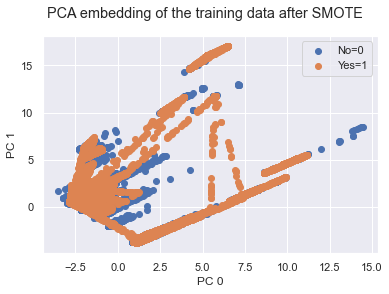

In [104]:
# see distrbution of pca after imbalance

# reducing the feature to 2 dimensions using PCA
pca_2d = PCA(n_components=2)

# use PCA to fit the training set
pca_2d.fit(X_train_SMOTE)

# use PCA to transform the training set
Z_train_pca_2d = pca_2d.transform(X_train_SMOTE)

# layering '0' samples onto '1' samples
layer0 = (Y_train_SMOTE == 0)
layer1 = (Y_train_SMOTE == 1)

fig, ax = plt.subplots()

# numpy slicing 
ax.scatter(Z_train_pca_2d[layer0, 0], Z_train_pca_2d[layer0, 1], label='No=0')
ax.scatter(Z_train_pca_2d[layer1, 0], Z_train_pca_2d[layer1, 1], label='Yes=1')

# label axis
ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
fig.suptitle('PCA embedding of the training data after SMOTE');
ax.legend()
plt.show()

The above diagram shows that there are many more data samples in the minority class (Yes claims) created along the lines between the original examples in the minority class.

## 4. Model Building

Due to the imbalanced nature of the dataset, we will focus on looking at the F1 score as our key metric to assess the model performance. We avoid looking at the accuracy metric as it is useless, since a dataset can have high accuracy and perform worse than a dataset with a lower accuracy. Therefore, looking at the accuracy score would be misleading.

We now test our models under each of our training sets from undersampling, oversampling and SMOTE.

In [398]:
# import confusion matrix for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

# import sns to plot the confusion matrix
import seaborn as sns 

In [106]:
# define a function to avoid repeating the same code for every model 

def simple_eval(X_train, Y_train, clf, name, output=True):
  
    print(f'Model: {name}')
    
    # calculate ccuracy score 
    accuracy = cross_val_score(clf, X_train, Y_train, scoring='accuracy')
    accuracy_score = np.mean(accuracy)
    print("Accuracy Mean: %f" %(100 * accuracy_score))
    
    # calculate f1 score
    f1 = cross_val_score(clf, X_train, Y_train, scoring='f1')
    f1_score = np.mean(f1)
    print("F1 Score Mean: %f" % (100 * f1_score))
    
    # calculate precision score
    precision = cross_val_score(clf, X_train, Y_train, scoring='precision')
    precision_score = np.mean(precision)
    print("Precision Score Mean: %f" % (100 * precision_score))
    
    # calculate recall score
    recall = cross_val_score(clf, X_train, Y_train, scoring='recall')
    recall_score = np.mean(recall)
    print("Recall Mean: %f" % (100 * recall_score))
    
    # create onfusion matrix
    predictions = cross_val_predict(clf, X_train, Y_train)
    confusion = confusion_matrix(Y_train, predictions)
    confusion = pd.DataFrame(data=confusion, columns=['Predicted:NO','Predicted:YES'],index=['True:NO','True:YES'])
    
    # plot the heatmap of the confusion matrix
    ax = plt.axes()
    ax.set_title(f'Confusion Matrix of {name}')
    sns.heatmap(confusion, annot=True, fmt='d') 
    plt.show()
    
    # return metrics
    if(output):
        return [f1_score, accuracy_score, recall_score, precision_score]

In the case of predicting travel insurance claim statuses, it is important to see if the model is able to predict the claim status of the applications as denied that originally got denied. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.

### 4.1. Training Data with Under Sampling

### 4.1.1 Logistic Regression

Model: Logistic Regression
Accuracy Mean: 74.297483
F1 Score Mean: 74.331346
Precision Score Mean: 74.292195
Recall Mean: 74.450097


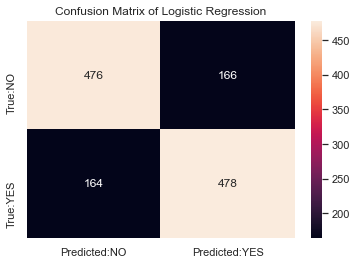

In [135]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# define the classifier model
lr_US = LogisticRegression(random_state = 42, max_iter = 200)

# results from training set
f1_lr_US, acc_lr_US, recall_lr_US, precision_lr_US = simple_eval(X_train_US, Y_train_US, lr_US, 'Logistic Regression')

### 4.1.2 Random Forest

Model: Random Forest
Accuracy Mean: 73.676739
F1 Score Mean: 73.557824
Precision Score Mean: 74.012971
Recall Mean: 73.206153


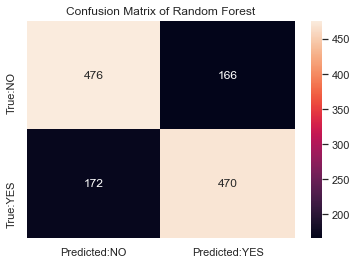

In [137]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# define the classifier model
rfc_US = RandomForestClassifier(random_state=42)

# results from training set
f1_rfc_US, acc_rfc_US, recall_rfc_US, precision_rfc_US = simple_eval(X_train_US, Y_train_US, rfc_US, 'Random Forest')

### 4.1.3 Decision Tree

Model: Decision Tree
Accuracy Mean: 66.591379
F1 Score Mean: 66.539778
Precision Score Mean: 66.606365
Recall Mean: 66.514050


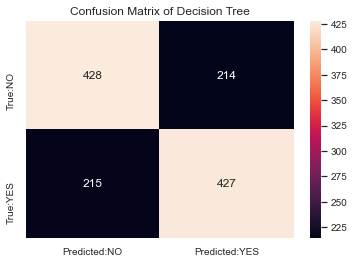

In [115]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# define the classifier model
dtc_US = DecisionTreeClassifier(random_state = 42)

# results from training set
f1_dtc_US, acc_dtc_US, recall_dtc_US, precision_dtc_US = simple_eval(X_train_US, Y_train_US, dtc_US, 'Decision Tree')

### 4.1.4 SGD 

Model: SGD Classifier
Accuracy Mean: 67.057089
F1 Score Mean: 67.308060
Precision Score Mean: 65.935980
Recall Mean: 69.031008


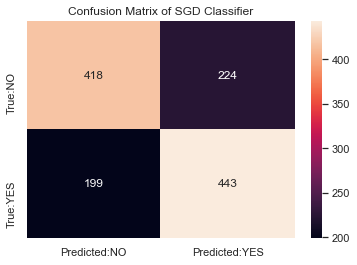

In [117]:
# import SGD
from sklearn.linear_model import SGDClassifier

# define the classifier model
sgd_US = SGDClassifier(random_state=42)

# results from training set 
f1_sgd_US, acc_sgd_US, recall_sgd_US, precision_sgd_US = simple_eval(X_train_US, Y_train_US, sgd_US, 'SGD Classifier')

### 4.1.5 KNN 

Model: KNN Classifier
Accuracy Mean: 71.885032
F1 Score Mean: 72.000592
Precision Score Mean: 71.913306
Recall Mean: 72.269864


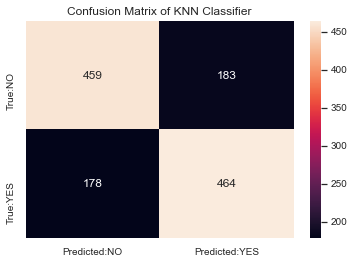

In [220]:
# import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# define the classifier model
knc_US = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# results from training set
f1_knc_US, acc_knc_US, recall_knc_US, precision_knc_US = simple_eval(X_train_US, Y_train_US, knc_US, 'KNN Classifier')

### 4.1.6 XGBoost

Model: XGBoost
Accuracy Mean: 70.871839
F1 Score Mean: 70.909974
Precision Score Mean: 70.916567
Recall Mean: 71.029554


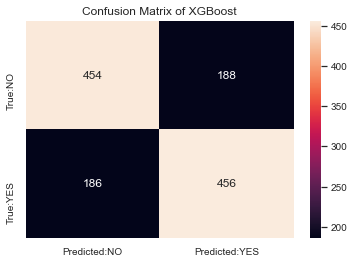

In [118]:
# import XGB Classifier
import xgboost as xgb
from xgboost import XGBClassifier

# define the classifier model
xgbc_US = XGBClassifier(random_state = 42)

# results from training set
f1_xgbc_US, acc_xgbc_US, recall_xgbc_US, precision_xgbc_US = simple_eval(X_train_US, Y_train_US, xgbc_US, 'XGBoost')

<div class="alert alert-block alert-success"> <b>Under Sampling:</b> Upon training the models with under sampling, we can see that Logistic Regression has performed the best with a F1 score of 74.33 out of all the models. This is a low score. </div>

### 4.2. Training Data with Over Sampling

### 4.2.1 Logistic Regression

Model: Logistic Regression
Accuracy Mean: 78.468059
F1 Score Mean: 78.580508
Precision Score Mean: 78.170386
Recall Mean: 78.997260


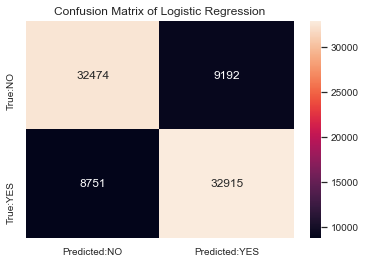

In [119]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# define the classifier model
lr_OS = LogisticRegression(random_state = 42, max_iter = 100)

# results from training set
f1_lr_OS, acc_lr_OS, recall_lr_OS, precision_lr_OS = simple_eval(X_train_OS, Y_train_OS, lr_OS, 'Logistic Regression')

### 4.2.2 Random Forest

Model: Random Forest
Accuracy Mean: 90.698647
F1 Score Mean: 90.642002
Precision Score Mean: 91.194807
Recall Mean: 90.097428


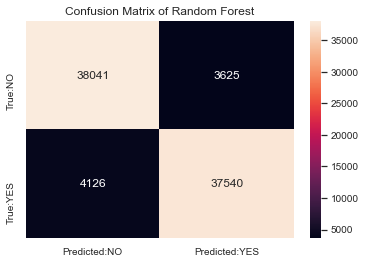

In [275]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# define the classifier model
rfc_OS = RandomForestClassifier(random_state=42, bootstrap= True,  max_depth= 16)

# results from training set
f1_rfc_OS, acc_rfc_OS, recall_rfc_OS, precision_rfc_OS = simple_eval(X_train_OS, Y_train_OS, rfc_OS, 'Random Forest')

### 4.2.3 Decision Tree


Model: Decision Tree
Accuracy Mean: 98.965583
F1 Score Mean: 98.976202
Precision Score Mean: 97.973203
Recall Mean: 100.000000


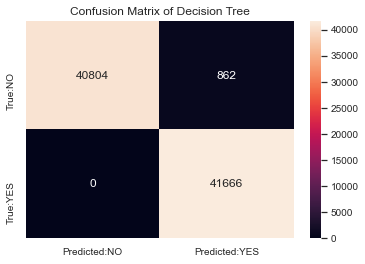

In [121]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# define the classifier model
dtc_OS = DecisionTreeClassifier(random_state = 42)

# results from training set
f1_dtc_OS, acc_dtc_OS, recall_dtc_, precision_without_dtc = simple_eval(X_train_OS, Y_train_OS, dtc_OS, 'Decision Tree')

### 4.2.4 SGD


Model: SDG Classifier
Accuracy Mean: 76.858831
F1 Score Mean: 75.693001
Precision Score Mean: 79.724197
Recall Mean: 72.077994


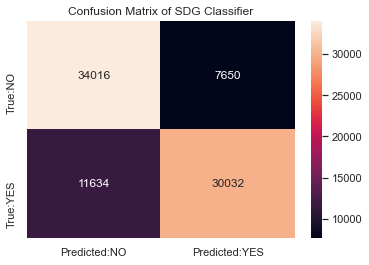

In [107]:
# import SGD
from sklearn.linear_model import SGDClassifier 

# define the classifier model
sgd_OS = SGDClassifier(random_state=42)

# results from training set
f1_sgd_OS, acc_sgd_OS, recall_sgd_OS, precision_sgd_OS = simple_eval(X_train_OS, Y_train_OS, sgd_OS, 'SGD Classifier')


### 4.2.5 KNN


Model: KNN Classifier
Accuracy Mean: 97.477553
F1 Score Mean: 97.495210
Precision Score Mean: 96.803709
Recall Mean: 98.197559


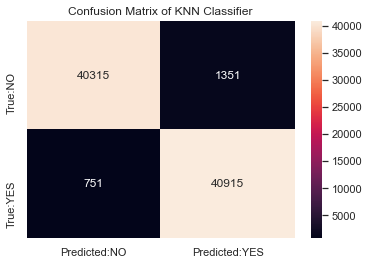

In [125]:
# import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# define the classifier model
knc_OS = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# results from training set
f1_knc_OS, acc_knc_OS, recall_knc_OS, precision_knc_OS = simple_eval(X_train_OS, Y_train_OS, knc_OS, 'KNN Classifier')

### 4.2.6 XGBoost


Model: XGBoost
Accuracy Mean: 93.503101
F1 Score Mean: 93.806363
Precision Score Mean: 89.623798
Recall Mean: 98.399177


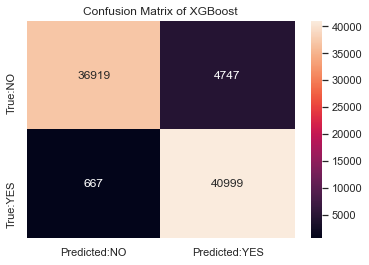

In [108]:
# import XGB Classifier
import xgboost as xgb
from xgboost import XGBClassifier

# define the classifier model
xgbc_OS = XGBClassifier(random_state = 42)

# results from training set
f1_xgbc_OS, acc_xgbc_OS, recall_xgbc_OS, precision_xgbc_OS = simple_eval(X_train_OS, Y_train_OS, xgbc_OS, 'XGBoost')

<div class="alert alert-block alert-success"> <b>Over Sampling:</b> Upon training the models with over sampling, we can see that Decision Trees has performed the best with a F1 score of 98.98 out of all the models. </div>

### 4.3. Training Data with SMOTE 

### 4.3.1 Logistic Regression

Model: Logistic Regression
Accuracy Mean: 78.100851
F1 Score Mean: 78.214556
Precision Score Mean: 77.810684
Recall Mean: 78.622852


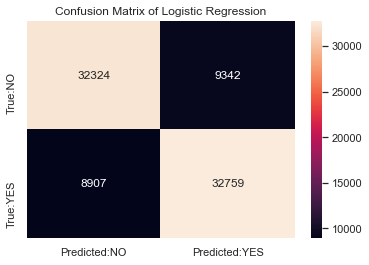

In [109]:
# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# define the classifier model
lr_SMOTE = LogisticRegression(random_state = 42, max_iter = 400)

# results from training set
f1_lr_SMOTE, acc_lr_SMOTE, recall_lr_SMOTE, precision_lr_SMOTE = simple_eval(X_train_SMOTE, Y_train_SMOTE, lr_SMOTE, 'Logistic Regression')

### 4.3.2 Random Forest

Model: Random Forest
Accuracy Mean: 91.217066
F1 Score Mean: 91.435191
Precision Score Mean: 89.209704
Recall Mean: 93.776699


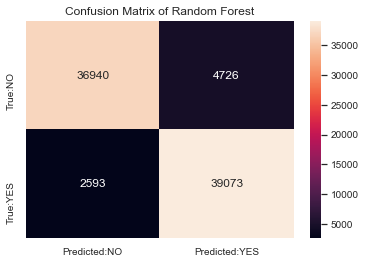

In [276]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# define the classifier model
rfc_SMOTE = RandomForestClassifier(random_state=42, bootstrap= True,  max_depth= 16) # adding random_state=42 to make this notebook's output constant

# results from training set
f1_rfc_SMOTE, acc_rfc_SMOTE, recall_rfc_SMOTE, precision_rfc_SMOTE = simple_eval(X_train_SMOTE, Y_train_SMOTE, rfc_SMOTE, 'Random Forest')

Looking at the misclassified instances, we can observe that 964 malignant cases have been classified incorrectly as benign (False negatives). Also, 1442 benign case has been classified as malignant (False positive).

### 4.3.3 Decision Tree

Model: Decision Tree
Accuracy Mean: 96.402352
F1 Score Mean: 96.398364
Precision Score Mean: 96.277303
Recall Mean: 96.548719


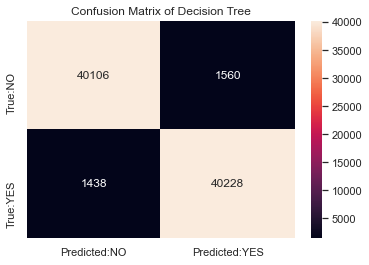

In [111]:
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# define the classifier model
dtc_SMOTE = DecisionTreeClassifier(random_state = 42)

# results from training set
f1_dtc_SMOTE, acc_dtc_SMOTE, recall_dtc_SMOTE, precision_dtc_SMOTE = simple_eval(X_train_SMOTE, Y_train_SMOTE, dtc_SMOTE, 'Decision Tree')

Precision is good, as the model classified many of the actual 'No' claims as 'Yes' (ie. 1638), compared to the number of actual 'Yes' claims classified as 'Yes' (ie. 40212).


### 4.3.4 SGD

Model: SGD Classifier
Accuracy Mean: 76.375221
F1 Score Mean: 74.922978
Precision Score Mean: 79.822260
Recall Mean: 70.597106


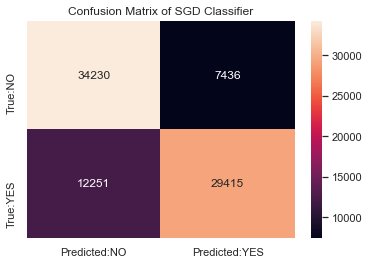

In [114]:
# import SGD
from sklearn.linear_model import SGDClassifier

# define the classifier model
sgd_SMOTE = SGDClassifier(random_state=42)

# results from training set
f1_sgd_SMOTE, acc_sgd_SMOTE, recall_sgd_SMOTE, precision_sgd_SMOTE = simple_eval(X_train_SMOTE, Y_train_SMOTE, sgd_SMOTE, 'SGD Classifier')

### 4.3.5 KNN 

Model: KNN Classifier
Accuracy Mean: 94.285509
F1 Score Mean: 94.470874
Precision Score Mean: 91.502875
Recall Mean: 97.638359


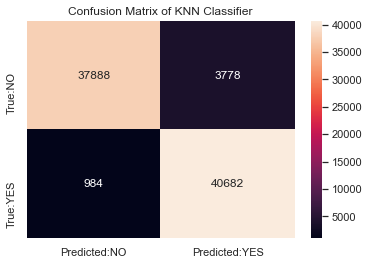

In [122]:
# import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# define the classifier model
knc_SMOTE = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# results from training set
f1_knc_SMOTE, acc_knc_SMOTE, recall_knc_SMOTE, precision_knc_SMOTE = simple_eval(X_train_SMOTE, Y_train_SMOTE, knc_SMOTE, 'KNN Classifier')

### 4.3.6 XGBoost

Model: XGBoost
Accuracy Mean: 96.746767
F1 Score Mean: 96.761483
Precision Score Mean: 96.028747
Recall Mean: 97.527941


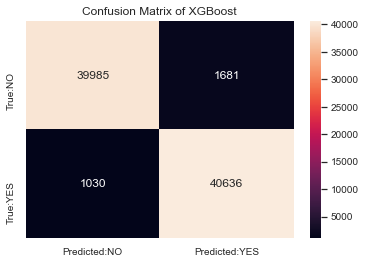

In [348]:
# import XGB Classifier
import xgboost as xgb
from xgboost import XGBClassifier

# define the classifier model
xgbc_SMOTE = XGBClassifier(random_state=42)

# results from training set
f1_xgbc_SMOTE, acc_xgbc_SMOTE, recall_xgbc_SMOTE, precision_without_xgbc = simple_eval(X_train_SMOTE, Y_train_SMOTE, xgbc_SMOTE, 'XGBoost')

<div class="alert alert-block alert-success"> <b>SMOTE:</b> Upon training the models with SMOTE, we can see that XGB Model has performed the best with a F1 score of 96.76 out of all the models. This is a very high score with high precision and recall.. </div>

On comparing the confusion matrix and their corresponding metrics of all 6 classifiers, it is clear that the Random Forest Classifier has performed better than any of the other classifiers. This is because, Random Forest is an ensemble technique which trains different decision trees and makes use of them to output the improved accuracy which is higher than the individual trees.

In this dataset, Random Forest is showing F1-score for test data = F-score : 0.9981356327196457 = 99.81% . Also the other metrics like Precision, Recall, Sensitivity, Specificity and Accuracy are all above 99.5% which are best among the 6.

### 4.4 Model Comparison (Train Set)



In [351]:
## creating a datafame with individual F1 scores from the training set

# constructing the dataframe
model_comparison = pd.DataFrame({'Logistic Regression':[74.331346, 78.580508, 78.214556], 
                     'Random Forest':[73.557824, 90.642002, 91.435191],
                     'Decision Tree':[66.539778, 98.976202, 96.398364], 
                     'SGD':[67.308060,75.693001,74.922978],
                     'KNN':[72.000592, 97.495210,94.470874],
                     'Models':['Under Sampling', 'Over Sampling', 'SMOTE'], 
                     'XGBoost':[70.909974, 93.806363, 96.761483]})
model_comparison

# set the index to models
model_comparison_new = model_comparison.set_index("Models")  

# highlight the best performing models in green
model_comparison_new.style.highlight_max(color='lightgreen') 

,Logistic Regression,Random Forest,Decision Tree,SGD,KNN,XGBoost
Models,,,,,,
Under Sampling,74.331346,73.557824,66.539778,67.308060,72.000592,70.909974
Over Sampling,78.580508,90.642002,98.976202,75.693001,97.495210,93.806363
SMOTE,78.214556,91.435191,96.398364,74.922978,94.470874,96.761483


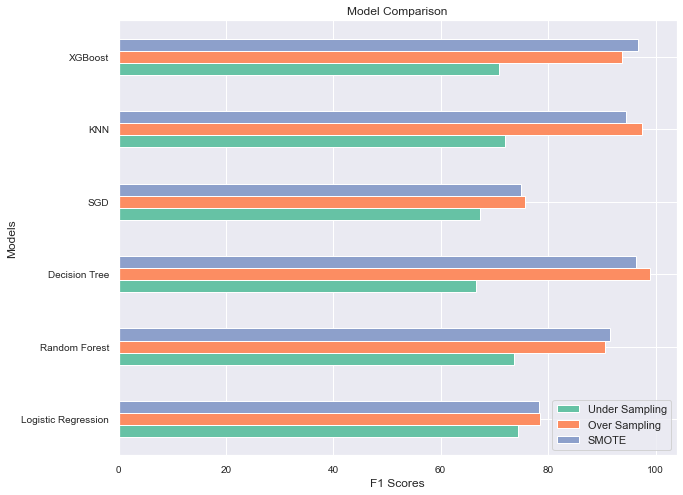

In [352]:
## plotting the models for visualisation of the models performance

# defining the variables
Under_Sampling = [74.331346, 73.557824, 66.539778, 67.308060, 72.000592, 70.909974]
Over_Sampling = [78.580508, 90.642002, 98.976202, 75.693001, 97.495210, 93.806363]
SMOTE = [78.214556, 91.435191, 96.398364, 74.922978, 94.470874, 96.761483]
index = ['Logistic Regression','Random Forest', 'Decision Tree', 'SGD', 'KNN','XGBoost']

# creating the dataframe
model_comparison_2 = pd.DataFrame({'Under Sampling': Under_Sampling, 'Over Sampling':Over_Sampling, 'SMOTE':SMOTE}, index=index)

# formatting the graph colour
color = sns.color_palette("Set2");

# plotting the dataframe
ax = model_comparison_2.plot.barh(figsize=(10,8), color=color);

# setting the axes labels
ax.set(xlabel="F1 Scores", ylabel="Models", title='Model Comparison');

## 5. Fine Tuning using GridSearchCV

Looking at the top 4 best performed models performed from training our model, we fine tune using grid search to improve the performance.

In [177]:
# import GridSearch CV
from sklearn.model_selection import GridSearchCV

### 5.1 Random Forest (SMOTE)




Use Gridsearch to maximise the F1 score.

In [280]:
# setting parameter space
parameter_space = \
    {
        "max_depth": [10,20], # maximum number of levels in each decision tree
        "min_samples_leaf": [3, 4], # minimum number of samples required to be at a leaf node
        "bootstrap": [True],
        "min_samples_split": [4, 6], # minimum number of samples required to split an internal node
        "n_estimators": [100, 200, X_train_OS.shape[1]], # max features on which the trees are trained
    }

from sklearn.ensemble import RandomForestClassifier

# define the classifier model
rf_OS = RandomForestClassifier(random_state=42) 

# performing grid search
randomforest_gridsearch = GridSearchCV(rf_OS, parameter_space, 
                   cv=3, scoring="f1", n_jobs=4)

# cross validated gridsearch
randomforest_gridsearch.fit(X_train_SMOTE, Y_train_SMOTE)

# store the best estimator with the best scoring hyperparameter combination
print("Best parameters:")
print(randomforest_gridsearch.best_params_)

Best parameters:
{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [281]:
# fit the model with new parameters
rf_model = RandomForestClassifier(**randomforest_gridsearch.best_params_)
rf_model.fit(X_train_SMOTE, Y_train_SMOTE)

# predict on train set
y_pred_rf_train = rf_model.predict(X_train_SMOTE)

# predict on test set
y_pred_rf_test = rf_model.predict(X_test)

In [282]:
# metrics score on train set

print('Accuracy Score:', (accuracy_score(Y_train_SMOTE, y_pred_rf_train ))*100)
print('F1 Score:', f1_score(Y_train_SMOTE, y_pred_rf_train )*100)
print('Precision Score:', precision_score(Y_train_SMOTE, y_pred_rf_train )*100)
print('Recall Score:', recall_score(Y_train_SMOTE, y_pred_rf_train )*100)

Accuracy Score: 93.38549416790669
F1 Score: 93.49432287609471
Precision Score: 91.98095680445888
Recall Score: 95.05832093313494


In [283]:
# metrics score on test set

print('Accuracy Score:', accuracy_score(Y_test, y_pred_rf_test)*100)
print('F1 Score:', f1_score(Y_test, y_pred_rf_test)*100)
print('Precision Score:', precision_score(Y_test, y_pred_rf_test)*100)
print('Recall Score:', recall_score(Y_test, y_pred_rf_test)*100)

Accuracy Score: 33.405029781601584
F1 Score: 3.807854696088584
Precision Score: 1.9465711027854697
Recall Score: 86.9090909090909


### 5.2 Decision Tree (Over Sampling)



In [203]:
# setting parameter space
parameter_space = \
    {
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train_OS.shape[1]],
    }

from sklearn.tree import DecisionTreeClassifier

dt_OS = DecisionTreeClassifier(random_state=42) 

decisiontree_gridsearch = GridSearchCV(dt_OS, parameter_space, 
                   cv=3, scoring="f1", n_jobs=4)

decisiontree_gridsearch.fit(X_train_OS, Y_train_OS)
print("Best parameters:")
print(decisiontree_gridsearch.best_params_)

Best parameters:
{'max_features': 194, 'min_samples_leaf': 3, 'min_samples_split': 5}


In [204]:
# fit the model with new parameters
dt_model = DecisionTreeClassifier(**decisiontree_gridsearch.best_params_)
dt_model.fit(X_train_OS, Y_train_OS)

# Predict on train set
y_pred_dt_train = dt_model.predict(X_train_OS)

#Predict on test set
y_pred_dt_test = dt_model.predict(X_test)

In [205]:
# metrics score on train set

print('Accuracy Score:', (accuracy_score(Y_train_OS,y_pred_dt_train))*100)
print('F1 Score:', f1_score(Y_train_OS, y_pred_dt_train)*100)
print('Precision Score:', precision_score(Y_train_OS, y_pred_dt_train)*100)
print('Recall Score:', recall_score(Y_train_OS, y_pred_dt_train)*100)

Accuracy Score: 99.4155906494504
F1 Score: 99.41898614872522
Precision Score: 98.84468483856428
Recall Score: 100.0


In [207]:
# metrics score on test set

print('Accuracy Score:', accuracy_score(Y_test, y_pred_tree)*100)
print('F1 Score:', f1_score(Y_test, y_pred_tree)*100)
print('Precision Score:', precision_score(Y_test, y_pred_tree)*100)
print('Recall Score:', recall_score(Y_test, y_pred_tree)*100)

Accuracy Score: 96.04015001103022
F1 Score: 6.020942408376963
Precision Score: 4.703476482617587
Recall Score: 8.363636363636363


### 5.3 KNN (Over Sampling)



In [335]:
# setting parameter space
parameter_space = \
    {
       "weights": ['uniform'],
       "algorithm":['auto'],
       "leaf_size":[50, X_train_OS.shape[1]],
    }

# import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knc_OS = KNeighborsClassifier(n_neighbors=6, n_jobs=5)

knn_gridsearch = GridSearchCV(knc_OS, parameter_space, 
                   cv=3, scoring="f1", n_jobs=4)

knn_gridsearch.fit(X_train_OS, Y_train_OS)
print("Best parameters:")
print(knn_gridsearch.best_params_)

Best parameters:
{'algorithm': 'auto', 'leaf_size': 50, 'weights': 'uniform'}


In [336]:
# fit the model with new parameters
knn_model = KNeighborsClassifier(**knn_gridsearch.best_params_)
knn_model.fit(X_train_OS, Y_train_OS)

# Predict on train set
y_pred_knn_train = knn_model.predict(X_train_OS)

#Predict on test set
y_pred_knn_test = knn_model.predict(X_test)

In [337]:
# metrics score on train set

print('Accuracy Score:', (accuracy_score(Y_train_OS,y_pred_knn_train))*100)
print('F1 Score:', f1_score(Y_train_OS, y_pred_knn_train)*100)
print('Precision Score:', precision_score(Y_train_OS, y_pred_knn_train)*100)
print('Recall Score:', recall_score(Y_train_OS, y_pred_knn_train)*100)

Accuracy Score: 98.38117409878558
F1 Score: 98.39666258602041
Precision Score: 97.46415200960655
Recall Score: 99.34718955503288


In [338]:
# metrics score on test set

print('Accuracy Score:', accuracy_score(Y_test, y_pred_knn_test)*100)
print('F1 Score:', f1_score(Y_test, y_pred_knn_test)*100)
print('Precision Score:', precision_score(Y_test, y_pred_knn_test)*100)
print('Recall Score:', recall_score(Y_test, y_pred_knn_test)*100)

Accuracy Score: 96.02911978821972
F1 Score: 35.018050541516246
Precision Score: 23.289315726290518
Recall Score: 70.54545454545455


### 5.4 XGBoost (SMOTE)



In [342]:
# setting parameter space
parameter_space = \
    {
       "max_depth": [6],
       "min_child_weight": [1],
       "colsample_bytree":[1],
       "subsample":[1, X_train_OS.shape[1]],
    }

# import KNN Classifier
from xgboost import XGBClassifier

xgbc_SMOTE = XGBClassifier()

xgbc_gridsearch = GridSearchCV(xgbc_SMOTE, parameter_space, 
                   cv=3, scoring="f1", n_jobs=4)

xgbc_gridsearch.fit(X_train_SMOTE, Y_train_SMOTE)
print("Best parameters:")
print(xgbc_gridsearch.best_params_)

Best parameters:
{'colsample_bytree': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1}


In [343]:
# fit the model with new parameters
xgbc_model = XGBClassifier(**xgbc_gridsearch .best_params_)
xgbc_model.fit(X_train_SMOTE, Y_train_SMOTE)

# Predict on train set
y_pred_xgbc_train = xgbc_model.predict(X_train_SMOTE)

#Predict on test set
y_pred_xgbc_test = xgbc_model.predict(X_test)

In [344]:
# metrics score on train set

print('Accuracy Score:', (accuracy_score(Y_train_OS,y_pred_xgbc_train))*100)
print('F1 Score:', f1_score(Y_train_OS, y_pred_xgbc_train)*100)
print('Precision Score:', precision_score(Y_train_OS, y_pred_xgbc_train)*100)
print('Recall Score:', recall_score(Y_train_OS, y_pred_xgbc_train)*100)

Accuracy Score: 97.31435702971247
F1 Score: 97.3364752927735
Precision Score: 96.54138533452948
Recall Score: 98.14477031632507


In [345]:
# metrics score on test set

print('Accuracy Score:', accuracy_score(Y_test, y_pred_xgbc_test)*100)
print('F1 Score:', f1_score(Y_test, y_pred_xgbc_test)*100)
print('Precision Score:', precision_score(Y_test, y_pred_xgbc_test)*100)
print('Recall Score:', recall_score(Y_test, y_pred_xgbc_test)*100)

Accuracy Score: 2.3328921244209133
F1 Score: 3.012213155156361
Precision Score: 1.5291370106761566
Recall Score: 100.0


### 5.5 Model Comparison after Fine Tuning (Train and Test Set)



##### Have the models improved in performance after fine tuning?

In [355]:
## creating a datafame with individual F1 scores from the training set before and after fine tuning

# constructing the dataframe
model_comparison_finetune = pd.DataFrame({'Random Forest':[91.435191,93.494323],
                     'Decision Tree':[98.976202,99.418986],
                     'KNN':[97.495210,98.396663],
                     'Models':['Before Fine Tune', 'After Fine Tune'], 
                     'XGBoost':[96.761483,97.336475]})
model_comparison_finetune

# set the index to models
model_comparison_finetune_new = model_comparison_finetune.set_index("Models")  

# highlight the best performing models in green
model_comparison_finetune_new.style.highlight_max(color='lightgreen') 

,Random Forest,Decision Tree,KNN,XGBoost
Models,,,,
Before Fine Tune,91.435191,98.976202,97.495210,96.761483
After Fine Tune,93.494323,99.418986,98.396663,97.336475


In [ ]:
# we can see that finetuning the models has improved the model performance.

<div class="alert alert-block alert-success"> It appears the best model with the highest F1 score is Decision Tree followed by KNN, which suggests that these are good model to predict the travel insurance claims.
</div>

##### Model performance on the test set

In [358]:
model = ['Random Forest','Decision Tree', 'KNN','XGBoost']
f1_test_scores = [3.807855,6.020942,35.018051, 3.012213]

df_complete_test = pd.DataFrame({'F1 Score Test': f1_test_scores}, index=model)

df_complete_test

,F1 Score Test
Random Forest,3.807855
Decision Tree,6.020942
KNN,35.018051
XGBoost,3.012213


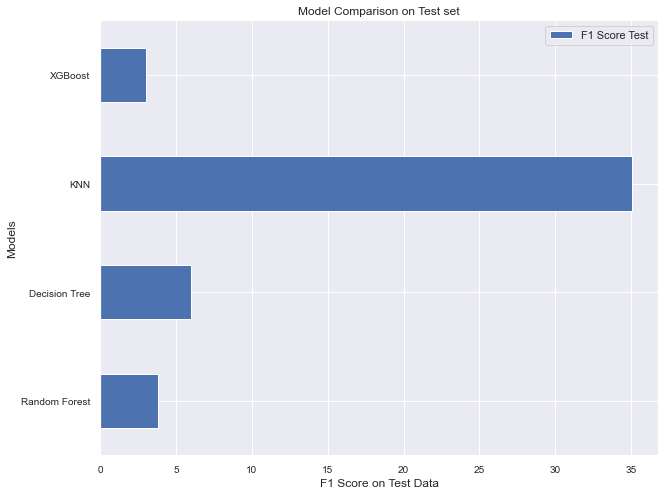

In [361]:
ax = df_complete_test.plot.barh(figsize=(10,8));
ax.set(xlabel="F1 Score on Test Data", ylabel="Models", title='Model Comparison on Test set');

<div class="alert alert-block alert-success"> It appears that when the model is tested on the testing data, it doesn't produce very good results. This can be explained due to the imbalance issue. KNN performs the best out of all the model with a 35.02 F1 Score compared to the other models.
</div>

##### Model performance looking at the train vs test set

In [364]:
## creating a datafame with individual F1 scores from the train set and test set

# constructing the dataframe
model_comparison_finetune_2 = pd.DataFrame({'Random Forest':[93.494323,3.807855],
                     'Decision Tree':[99.418986,6.020942],
                     'KNN':[98.396663,35.018051],
                     'Models':['Train', 'Test'], 
                     'XGBoost':[97.336475,3.012213]})
model_comparison_finetune_2

# set the index to models
model_comparison_finetune_2_new = model_comparison_finetune_2.set_index("Models")  
model_comparison_finetune_2_new 

,Random Forest,Decision Tree,KNN,XGBoost
Models,,,,
Train,93.494323,99.418986,98.396663,97.336475
Test,3.807855,6.020942,35.018051,3.012213


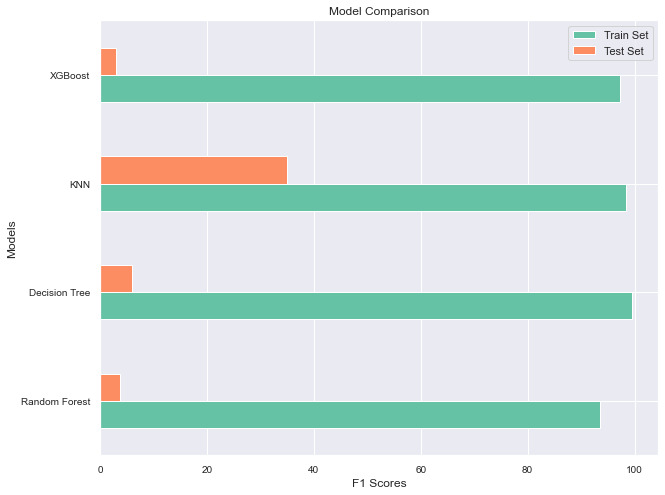

In [365]:
## plotting the models for visualisation of the models performance

# defining the variables
Train = [93.494323, 99.418986, 98.396663, 97.336475]
Test = [3.807855, 6.020942, 35.018051, 3.012213]
index = ['Random Forest', 'Decision Tree', 'KNN', 'XGBoost']

# creating the dataframe
model_comparison_3 = pd.DataFrame({'Train Set': Train, 'Test Set':Test}, index=index)

# formatting the graph colour
color = sns.color_palette("Set2");

# plotting the dataframe
ax = model_comparison_3.plot.barh(figsize=(10,8), color=color);

# setting the axes labels
ax.set(xlabel="F1 Scores", ylabel="Models", title='Model Comparison');

## 6. Conclusion

Due to the hugely imbalance nature of the dataset, although the training set obtained a high f1 score, when we train this model on the test set, it gives us very low F1 score meaning that the model is overfitting as it replicates the samples in the minority class. With help of more data samples in the minority class, we would be able to get better F1 scores and better model performance. 

With more time, further models could have been trained like SVM and other techniques to fine tune the model could be used. 

## References

Hands-On Machine Learning with Scikit-Learn & TensorFlow, Aurélien Géron